In [2]:
import numpy as np

In [187]:
import importlib
import util
importlib.reload(util)
from util import *

In [4]:
Nx = 41

In [5]:
for N,mc in models.items():
    model = mc(Nx)
    print(N, " : ",count_parameters(model))

PureStencil  :  3
PureLinear  :  1599
DeepStencil  :  556
LeakyDeepStencil  :  556
LeakyFCMLP  :  28339
FCMLP  :  28339


In [6]:
41*100*10

41000

In [7]:
for N,mc in discriminators.items():
    model = mc(Nx,3)
    print(N, " : ",count_parameters(model))

ConditionalConv  :  131


In [9]:
import itertools

# Plot against the numerical solutions

In [17]:
import sys
if False: # On colab
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    root = "/content/drive/My Drive/Colab Notebooks/burgers/"
    sys.path.append("/content/drive/My Drive/Colab Notebooks/burgers/")
else: # Local
    root = './'
import numpy as np
import torch
from matplotlib import pylab as plt
if torch.cuda.device_count()>0:
    device = torch.device('cuda:3')
    print("Connected to a GPU")
else:
    print("Using the CPU")
    device = torch.device('cpu')

Connected to a GPU


In [27]:
num = np.loadtxt("data/numerical_methods")

In [28]:
lax = num[:,:41]
gudonov = num[:,41:]

In [30]:
from matplotlib import pylab as plt
%matplotlib inline

0
19
39
59
79
99


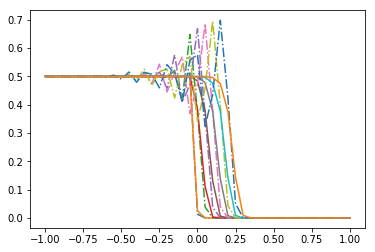

In [31]:
x = np.linspace(-1,1,41)
for i in [0]+list(range(19,100,20)):
    print(i)
    plt.plot(x,lax[i,:],'-.')
    plt.plot(x,gudonov[i,:])
plt.show()

In [149]:
root = './'
dataname = "burgers"
data = np.load(root+f"data/{dataname}.npz")
dataset = torch.tensor(data['U'],dtype=torch.float32,device=device)
Ntraj,Nt,Nx = dataset.shape

In [11]:
stash = torch.load("models_burgers.pkl")

In [197]:
stash_multi = torch.load("models_multi_burgers.pkl")

In [198]:
stash_multi.keys()

dict_keys([('CELU', 2, 5, 2), ('CELU', 2, 5, 3), ('CELU', 2, 5, 4), ('CELU', 2, 10, 2), ('CELU', 2, 10, 3), ('CELU', 2, 10, 4), ('ReLU', 2, 5, 2), ('ReLU', 2, 5, 3), ('ReLU', 2, 5, 4), ('ReLU', 2, 10, 2), ('ReLU', 2, 10, 3), ('ReLU', 2, 10, 4), ('CELU', 3, 5, 2), ('CELU', 3, 5, 3), ('CELU', 3, 5, 4), ('ReLU', 3, 5, 2), ('ReLU', 3, 5, 3), ('ReLU', 3, 5, 4), ('CELU', 3, 10, 4), ('ReLU', 3, 10, 4), ('ReLU', 3, 10, 2), ('ReLU', 3, 10, 3), ('Tanh', 3, 5, 2), ('Tanh', 3, 5, 3), ('Tanh', 3, 5, 4), ('Tanh', 3, 10, 2), ('Tanh', 3, 10, 3), ('Tanh', 3, 10, 4)])

In [84]:
def riemann(uL,uR):
    def sol(x,t):
        if uL>=uR:
            S = 0.5*(uL+uR)
            return uL if x<S*t else uR
        else:
            if(x<uL*t): return uL
            if(x>=uR*t): return uR
    
            f = (x/t - uL)/(uR-uL);
            return (1.0-f)*uL + f*(uR)
    return np.vectorize(sol)

In [23]:
truesol = riemann(0.5,0)

In [151]:
len(fetched_models.keys())

22

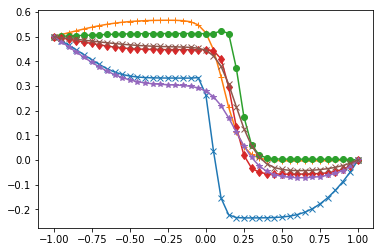

In [205]:
err_all1 = {}
for N,m in stash.items():
    err_all1[N] = do_a_path(m['model'], torch.tensor(np.expand_dims(truedata,0),dtype=torch.float32,device=device),0,
                   Nstep=99,Nplot=1,label=N,x=x,marker=markerdict[N])

In [207]:
kk = list(err_all1.keys())
kk.sort(key=lambda x : err_all1[x][-1])
print(kk)

[('CELU', 3, 10), ('Sigmoid', 3, 15), ('CELU', 3, 15), ('Sigmoid', 3, 5), ('Sigmoid', 3, 10), ('CELU', 3, 5)]


In [ ]:
AA = {}
AA.update

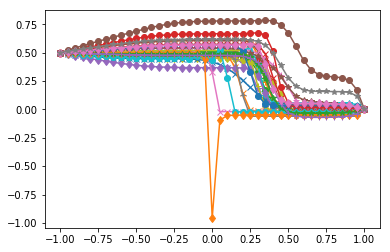

In [202]:
err_all = {}
for N,m in stash_multi.items():
    err_all[N] = do_a_path(m['model'], torch.tensor(np.expand_dims(truedata,0),dtype=torch.float32,device=device),0,
                   Nstep=99,Nplot=1,label=N,x=x,marker=markerdict[N])

In [204]:
kk = list(err_all.keys())
kk.sort(key=lambda x : err_all[x][-1])
print(kk)

[('ReLU', 2, 10, 4), ('ReLU', 3, 5, 4), ('ReLU', 3, 10, 2), ('CELU', 2, 10, 3), ('ReLU', 2, 10, 3), ('CELU', 3, 10, 4), ('CELU', 2, 5, 4), ('ReLU', 2, 5, 3), ('CELU', 2, 5, 2), ('Tanh', 3, 5, 2), ('CELU', 3, 5, 2), ('ReLU', 2, 10, 2), ('CELU', 3, 5, 4), ('ReLU', 2, 5, 4), ('Tanh', 3, 5, 4), ('ReLU', 3, 10, 4), ('CELU', 2, 10, 2), ('CELU', 2, 5, 3), ('CELU', 2, 10, 4), ('Tanh', 3, 10, 3), ('ReLU', 3, 5, 2), ('ReLU', 2, 5, 2), ('Tanh', 3, 5, 3), ('ReLU', 3, 5, 3), ('Tanh', 3, 10, 4), ('CELU', 3, 5, 3), ('ReLU', 3, 10, 3), ('Tanh', 3, 10, 2)]


99


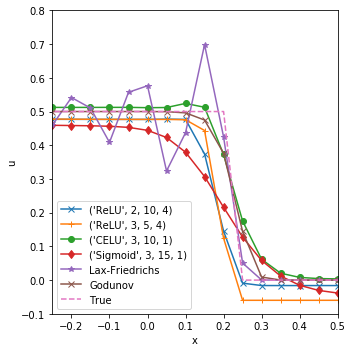

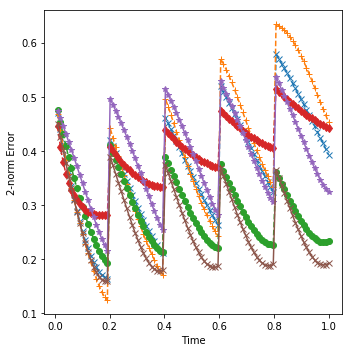

In [214]:
# fetched_models = {
#     'CELU_3_10_1':stash[('CELU',3,10)]['model'],
#     #'CELU_2_5_4':stash_multi[('CELU',2,5,4)]['model'],
#     #'ReLU_2_5_4':stash_multi[('ReLU',2,5,4)]['model'],
#     #'ReLU_3_5_4':stash_multi[('ReLU',3,5,4)]['model'],
# }
cyc = itertools.cycle('x+od*')
markerdict = collections.defaultdict(lambda : next(cyc))
keys = [('ReLU', 2, 10, 4),
 ('ReLU', 3, 5, 4),
 #('ReLU', 3, 10, 2)
       ]
fetched_models = {N:stash_multi[N]['model'] for N in keys }
fetched_models.update({N+(1,):stash[N]['model'] for N in [('CELU', 3, 10), ('Sigmoid', 3, 15)]})
plt.figure(figsize=(5,5))
truedata = np.array([truesol(x,t) for t in np.linspace(0,1,100)])
err = {}
for N,m in fetched_models.items():
    err[N] = do_a_path(m, torch.tensor(np.expand_dims(truedata,0),dtype=torch.float32,device=device),0,
                   Nstep=99,Nplot=1,label=N,x=x,marker=markerdict[N])
    #do_an_unknown_path(m, torch.tensor(truesol(x,0),dtype=torch.float32,device=device),
    #               Nstep=100,Nplot=1,label=N,x=x)
x = np.linspace(-1,1,41)
for i in list(range(99,100,50)):
    print(i)
    plt.plot(x,lax[i,:],'-', label="Lax-Friedrichs",marker=markerdict["Lax-Friedrichs"])
    plt.plot(x,gudonov[i,:],'-', label="Godunov",marker=markerdict["Godunov"])
    plt.plot(x,truesol(x,i/100.0), '--',label='True')
plt.xlim((-0.25,0.5))
plt.ylim((-0.1,0.8))
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.tight_layout()
plt.savefig('paper/shockwave_profile.png',dpi=300)
plt.show()

plt.figure(figsize=(5,5))
err["Lax-Friedrichs"] = np.linalg.norm(truedata-lax,axis=1)[1:]
err["Godunov"] = np.linalg.norm(truedata-gudonov,axis=1)[1:]
for N in fetched_models.keys():
    plt.plot(np.linspace(0,1,100)[1:], err[N], '--',label=N,marker=markerdict[N])
    
plt.plot(np.linspace(0,1,100)[1:], err["Lax-Friedrichs"], '-',marker=markerdict["Lax-Friedrichs"],label="Lax-Friedrichs")
plt.plot(np.linspace(0,1,100)[1:], err["Godunov"], '-',marker=markerdict["Godunov"],label="Godunov")

plt.xlabel('Time')
plt.ylabel('2-norm Error')
#plt.legend()
plt.tight_layout()
plt.savefig('paper/shockwave_error.png',dpi=300)
plt.show()

['Godunov', ('ReLU', 2, 10, 4), ('ReLU', 3, 5, 4), ('ReLU', 3, 10, 2)]


In [168]:
import itertools
import collections